# ⭐ Liner Regression ⭐


# Theoreitcal part

**our goal is trying to fit the best line (in other words approximating a polynomyal like we do in Tailer series approximation)**

1.   define a loss function like MSE for example
2.   minmize that loss function

  find the first dervtive set it equal to zero, then if the second dervtive is postive it is a minuma.

  if we have more than one varible in our hypothisis then we need to take the partial derviteves to each of them and set it equal to zero, **the vector of partial dervtive is the gradient**
3. now it's better to vectorize the equations for easier computations

    y=X+w

    where:

    y: is a col vector (mx1)

    X: matrix mx(n+1) ... n is the number of featuers plus col of ones for the baies term

    w: col vector with n+1 rows represiting the coffeicents

4. now we've vectorize the equation we need to find the min value of w using the [*Normal equation*](https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression/) : w=(X$^T$X)$^{-1}$ X$^T$ y




# Examples with Normal equation

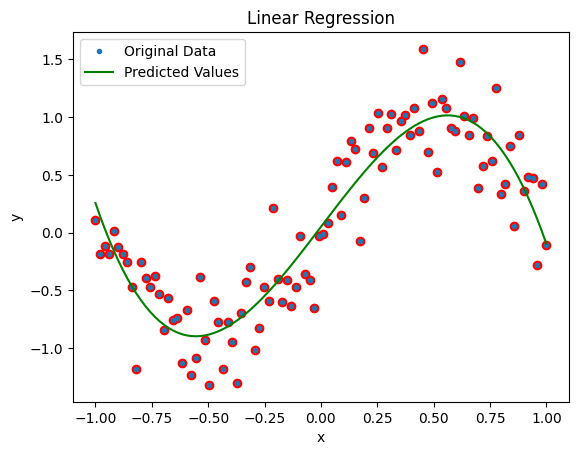

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
pi = math.pi

x1 = np.linspace(-1, 1, 100)

y1 = np.sin(2 * pi * 0.5 * x1) + 0.3 * np.random.randn(x1.size)
plt.plot(x1, y1, 'ro')

# Reshape x and y to column vectors
x1 = x1.reshape(-1, 1)
y1 = y1.reshape(-1, 1)

# Number of features
num_features = 3

# Construct the feature matrix A
A = []
for i in range(num_features + 1):
    A.append(x1**i)  # A = [1, x, x**2, x**3]

A = np.array(A).squeeze().T

# Calculate the weights using the normal equation
w = np.linalg.inv(A.T @ A) @ (A.T @ y1)

# Compute the predicted values
yhat = A @ w

# Plot the original data and the predicted values
plt.plot(x1, y1, '.', label='Original Data')
plt.plot(x1, yhat, 'g', label='Predicted Values')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()


(20,)
(20,)
(20, 1)
(20, 1)


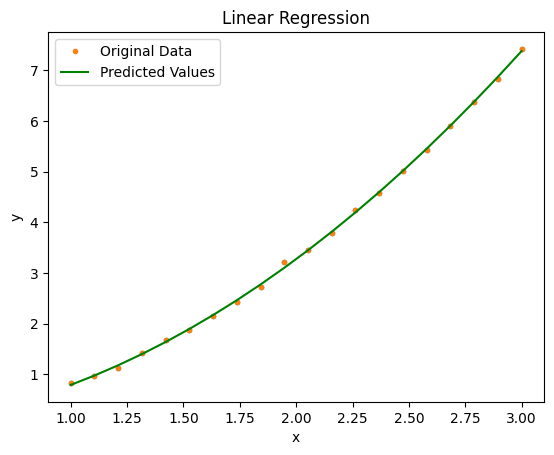

In [ ]:
#Q2
import matplotlib.pyplot as plt
import numpy as np

gmoon=9.8/6
t=np.linspace(1,3,20)
s=0.5*gmoon*t**2 + 0.05*np.random.randn(t.size)
plt.plot(t,s,'.')

print(t.shape)
print(s.shape)

# Reshape x and y to column vectors
t = t.reshape(-1, 1)
s = s.reshape(-1, 1)

print(t.shape)
print(s.shape)

# Number of features
num_features = 2

# Construct the feature matrix A
A = []
for i in range(num_features + 1):
    A.append(t**i)  # A = [1, x, x**2, x**3]

A = np.array(A).squeeze().T

# Calculate the weights using the normal equation
w = np.linalg.solve(A.T @ A , A.T @ s)

# Compute the predicted values
yhat = A @ w

# Plot the original data and the predicted values
plt.plot(t, s, '.', label='Original Data')
plt.plot(t, yhat, 'g', label='Predicted Values')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()


Q3: real data example


# 2D liner regression

now instead of just fitting a line through data, we're trying to fit a plane or maybe a higher diemnsional object (using additional featuers )

we'll implement two methods:


1.   loops
2.   brodcasting



(100, 100)
(100, 100)
(100, 100)


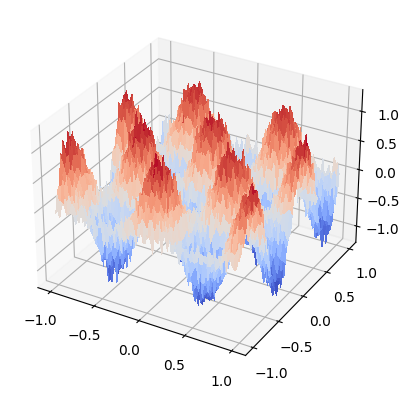

In [ ]:
#Linear Regression for general functions
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

pi=math.pi

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x1=np.linspace(-1,1,100)
x2=np.linspace(-1,1,100)
[X1,X2]=np.meshgrid(x1,x2)

Y=np.cos(2*pi*X1)*np.sin(2*pi*1*X2)+0.1*np.random.randn(X1.shape[0],X1.shape[1])


surf = ax.plot_surface(X1, X2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

print(X1.shape)
print(X2.shape)
print(Y.shape)

(10000, 1)
(10000, 1)
(10000, 1)
(10000, 81)


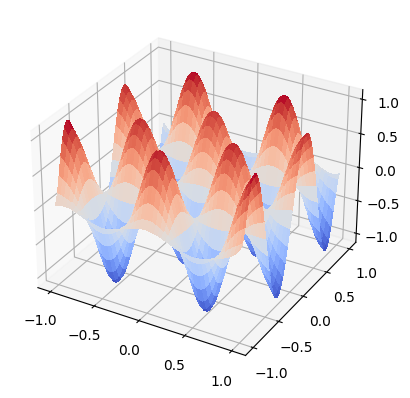

In [ ]:
X_NEW = X1.reshape(-1,1)
X2_NEW = X2.reshape(-1,1)
Y = Y.reshape(-1,1)

print(X_NEW.shape)
print(X2_NEW.shape)
print(Y.shape)

M=8
A=[]
for i in range(M+1):
  for j in range(M+1):
    A.append(X_NEW**i * X2_NEW**j)

A = np.array(A).squeeze().T
print(A.shape)
w = np.linalg.solve(A.T @ A , A.T@Y)
yhat = A @ w

yhat = yhat.reshape(100,100) # so i can plot it ?
fig1 = plt.figure()
axe1 = fig1.add_subplot(projection='3d')
surf = axe1.plot_surface(X1, X2, yhat, cmap=cm.coolwarm, linewidth=0, antialiased=False)


we can also do it without the nested loops using **brodcasting** in numpy, Broadcasting allows you to perform element-wise operations between arrays of different shapes by automatically aligning their dimensions.

(10000, 1, 1)
(10000, 1, 1)
(10000, 1)
(1, 9, 1)
(1, 1, 9)
(10000, 81)


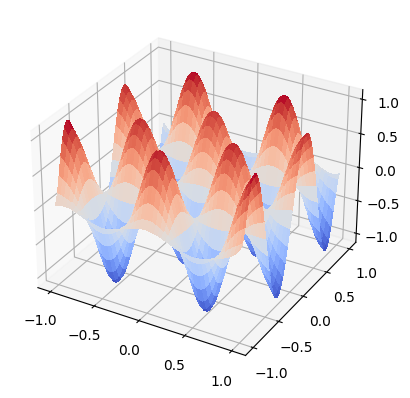

In [ ]:

X1_NEW = X1.reshape(-1, 1,1)
X2_NEW = X2.reshape(-1, 1,1)
Y = Y.reshape(-1, 1)

print(X1_NEW.shape)
print(X2_NEW.shape)
print(Y.shape)


M = 8

I = np.arange(M+1) # create an array from 0 to M
J = np.arange(M+1)
I = I[np.newaxis , : , np.newaxis ] # shape = (1,9,1)
J =J[np.newaxis ,np.newaxis , : ]

print(I.shape)
print(J.shape)


A = (X1_NEW ** I * X2_NEW**J).reshape(-1,81)

print(A.shape)


w = np.linalg.solve(A.T @ A, A.T @ Y)

yhat = A @ w

yhat = yhat.reshape(100, 100)

fig1 = plt.figure()
axe1 = fig1.add_subplot(projection='3d')
surf = axe1.plot_surface(X1, X2, yhat, cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.show()

